# <center>Statistical Models and Computing Methods, Problem Set 2
<center>王宇哲 2201112023
<center>Academy for Advanced Interdisciplinary Studies, Peking University

## Problem 1

The standard Laplace distribution has density
$$
f(x)=\frac{1}{2}e^{-|x|}, \ \ -\infty <x<\infty\tag{1}
$$

(1) Describe how to generate a standard Laplace random variable by inverting the CDF.

***Proof.*** By integrating the PDF of the standard Laplace distribution $(1)$, we have the CDF
$$
F(x)=\int_{-\infty}^{x}f(u)du=\left\{\begin{aligned}
&\frac{1}{2}e^{x},\ \ x<0\\
&1-\frac{1}{2}e^{-x},\ \ x\geq 0\end{aligned}\right.\tag{2}
$$
By inverting the CDF we have
$$
F^{-1}(x)=\left\{\begin{aligned}
&\ln{(2x)},\ \ 0\leq x<0.5\\
&-\ln{(2-2x)},\ \ 0.5\leq x\leq 1\end{aligned}\right.\tag{3}
$$
Sample $x$ as follows to generate a standard Laplace random variable.
$$
x=F^{-1}(u), \ \ u\sim {\rm Uniform}(0,1)\tag{4}
$$

(2) Describe and implement a rejection sampling algorithm to simulate random draws from the standard normal distribution using (a multiple of) the Laplace density as the envelop function. Hint: how do you choose the constant multiple to make sure that this is a valid envelop?

***Proof.*** Consider the standard normal distribution with PDF
$$
g(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\tag{5}
$$
Rejection sampling algorithm using the Laplace density (multiplied by a constant $c$) as the envelope function requires
$$
cf(x)\geq g(x)\tag{6}
$$
Hence
$$
c\geq \max_{x\in\mathbb{R}}\frac{g(x)}{f(x)}=\max_{x\in\mathbb{R}}\Big(\sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}+|x|}\Big)=\sqrt{\frac{2 e}\pi}\tag{7}
$$
Let $c^{*}=\sqrt{\frac{2 e}{\pi}}$, the rejection sampling algorithm is described as follows:
1. draw a sample $x$ from $f(x)$
2. generate $u\sim {\rm Uniform}(0,1)$
3. if 
$$
u\leq \frac{g(x)}{c^{*}f(x)}=\sqrt{\frac{\pi}{2 e}}\frac{g(x)}{f(x)}\tag{8}
$$
we accept $x$ as the new sample, otherwise, reject $x$
4. return to step 1

Python implementation of the rejection sampling algorithm is as follows. 

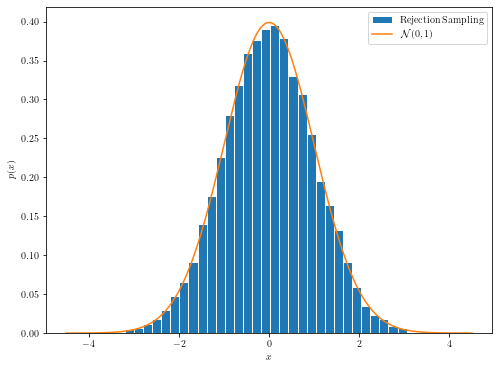

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x:float):
    """
    PDF of the standard Laplace distribution
    """
    return 0.5 * np.exp(-np.abs(x))

def g(x:float):
    """
    PDF of the the standard normal distribution
    """
    return np.exp(- x**2 / 2) / np.sqrt(2 * np.pi)

def F_inv(x:float):
    """
    inverse function of the CDF of the standard Laplace distribution
    """
    assert (x >= 0 and x <= 1), "invalid input for F_inv"
    if x < 0.5:
        return np.log(2 * x)
    else:
        return -np.log(2 - 2 * x)

c = np.sqrt(2 * np.e / np.pi)
x_list = []

while len(x_list) <= 10000:
    (u, v)=np.random.rand(2)
    x = F_inv(u)
    if v <= (g(x) / (c * f(x))):
        x_list.append(x)


fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.hist(np.array(x_list), density=True, bins=40, edgecolor='white', label='$\\rm Rejection\, Sampling$')
ax.plot(np.linspace(-4.5, 4.5, 1000), g(np.linspace(-4.5, 4.5, 1000)), label='$\\mathcal{N}(0,1)$')

# plot settings
fig.set_size_inches(8,6)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.savefig('1-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that the result generated by rejection sampling algorithm fits well with the ground-truth distribution (yellow curve).

(3) Can one simulate Laplace random variables using rejection sampling with a multiple of the standard normal density as the envelop? Why or why not?

***Proof.*** No. Rejection sampling algorithm using the standard normal density (multiplied by a constant $c$) as the envelope function requires
$$
c\geq \max_{x\in\mathbb{R}}\frac{f(x)}{g(x)}=\max_{x\in\mathbb{R}}\Big(\sqrt{\frac{\pi}{2}}e^{\frac{x^2}{2}-|x|}\Big)=\infty\tag{9}
$$
Therefore, there is no such $c\in\mathbb{R}$ to make the rejection sampling algorithm feasible. More intuitively, (a multiple of) the standard normal density cannot serve as the envelope function for the standard Laplace density.

## Problem 2

Consider a target distribution of the following form
$$
\pi(x)=\int\pi(x,z)dz\tag{10}
$$

(1) Let K be a positive integer. Show that the following estimate of $\pi(x)$ is unbiased
$$
\hat{\pi}(x)=\frac{1}{K}\sum_{i=1}^{K}\frac{\pi(x,z_{i})}{q(z_{i})},\ \ z_{i}\sim q(z)\tag{11}
$$

***Proof.*** Consider that
$$
\begin{aligned}
\mathbb{E}_{q}(\hat{\pi}(x))&=\frac{1}{K}\sum_{i=1}^{K}\mathbb{E}_{q}\Big(\frac{\pi(x,z_i)}{q(z_i)}\Big)\\
&=\frac{1}{K}\sum_{i=1}^{K}\int_{\mathcal{Z_i}}\frac{\pi(x,z_i)}{q(z_i)}q(z_i)dz_i\\
&=\frac{1}{K}\sum_{i=1}^{K}\int_{\mathcal{Z_i}}\pi(x,z_i)dz_i\\
&=\frac{1}{K}\sum_{i=1}^{K}\pi(x)\\
&=\pi(x)
\end{aligned}\tag{12}
$$
Hence $\hat{\pi}(x)$ is an unbiased estimate of $\pi(x)$.

(2) Construct a Markov chain as follows: at the current state $x$, propose a new state $x'\sim Q(x'|x)$ and accept it as the next state with the following probability
$$
a=\min\Big(1,\frac{\hat{\pi}(x')Q(x|x')}{\hat{\pi}(x)Q(x'|x)}\Big)\tag{13}
$$
where $\hat{\pi}(x)$ and $\hat{\pi}(x')$ are both estimated using (1); otherwise $x$ is the next state. Show that $\pi$ is a stationary distribution of the Markov chain. Hint: you may want to consider the corresponding Markov chain in an augmented space.

***Proof.*** Consider the Markov chain in an augmented space with variables $x,z_1,\ldots,z_K$. At the current state $(x,z_1,\ldots,z_K)$, propose a new state $x'\sim Q(x'|x)$, $z'_{i}\sim q(z)$ and accept it with probability $a(x'|x)$. Suppose that $\pi_0(x,z_1,\ldots,z_K)$ is a stationary distribution of the augmented Markov chain that satisfies the detailed balance condition, *i.e.*
$$
\pi_0(x,z_1,\ldots,z_K)Q(x'|x)\min{\Big(1, \frac{\hat{\pi}(x')Q(x|x')}{\hat{\pi}(x)Q(x'|x)}\Big)}\prod_{i=1}^{K}q(z'_i)=\pi_0(x',z'_1,\ldots,z'_K)\min{\Big(1, \frac{\hat{\pi}(x)Q(x'|x)}{\hat{\pi}(x')Q(x|x')}\Big)}\prod_{i=1}^{K}q(z_i)\tag{14}
$$
which is equivalent to
$$
\frac{\pi_0(x,z_1,\ldots,z_K)}{\hat{\pi}(x)\prod_{i=1}^{K}q(z_i)}=\frac{\pi_0(x',z'_1,\ldots,z'_K)}{\hat{\pi}(x')\prod_{i=1}^{K}q(z'_i)}\tag{15}
$$
by straightforward derivation. Notice that $(2)$ holds for $\forall (x,z_1,\ldots,z_K)\in\mathbb{R}^{K+1}$, hence we let
$$
\frac{\pi_0(x,z_1,\ldots,z_K)}{\hat{\pi}(x)\prod_{i=1}^{K}q(z_i)}=\lambda\in\mathbb{R}^{+},\ \ \forall (x,z_1,\ldots,z_K)\in\mathbb{R}^{K+1}\tag{16}
$$
which is equivalent to
$$
\pi_0(x,z_1,\ldots,z_K)=\lambda\hat{\pi}(x)\prod_{i=1}^{K}q(z_i)\tag{17}
$$
Consider that
$$
\hat{\pi}(x)\prod_{i=1}^{K}q(z_i)=\frac{1}{K}\sum_{i=1}^{K}\Big(\frac{\pi(x,z_{i})}{q(z_{i})}\prod_{j=1}^{K}q(z_j)\Big)=\frac{1}{K}\sum_{i=1}^{K}\Big(\pi(x,z_i)\prod_{1\leq j\leq K,\ \ j\neq i}q(z_j)\Big)\tag{18}
$$
with the true marginal stationary distribution of $x$ denoted by $\pi_0(x)$, we have
$$
\begin{aligned}
\pi_0(x)&=\int\cdots\int\pi_0(x,z_1,\ldots,z_K)dz_1\cdots dz_K\\
&=\frac{\lambda}{K}\sum_{i=1}^{K}\int\cdots\int\Big(\pi(x,z_i)\prod_{1\leq j\leq K,\ \ j\neq i}q(z_j)\Big)dz_1\cdots dz_K\\
&=\frac{\lambda}{K}\sum_{i=1}^{K}\int\pi(x,z_i)dz_i\\
&=\lambda\pi(x)
\end{aligned}\tag{19}
$$
We can deduct that $\lambda=1$ so as to normalize $\pi(x)$ and $\pi_0(x)$. Hence
$$
\pi_0(x)=\pi(x)\tag{20}
$$
by which we show that $\pi(x)$ is a stationary distribution of the Markov chain.

## Problem 3

Consider the probit regression model, with $x_{i}\in\mathbb{R}$ and $Y_i\in\{0,1\}$:
\begin{align}\begin{aligned}
p(Y_i=1|Z_i)&=p(Z_i\geq 0)\\
Z_i&\sim \mathcal{N}(x_i \beta, \sigma^2)\\
\beta&\sim\mathcal{N}(0,10^2)\\
\sigma^2&\sim{\rm Inv}\text{-}\chi^2(3,1)
\end{aligned}\tag{21}\end{align}
where $(x_i,y_i), i = 1,\ldots, n$ are the observe data. Download the data from the course website.

(1) Implement a Gibbs sampler for approximating the posterior of $(\beta,\sigma^2)$. Initialize the sampler at $(25,25)$ and run it for $20,000$ iterations (with no burn-in). Plot the samples on top of the contours of the true posterior.

***Proof.*** Consider that
$$
z_i = x_i\beta+\sigma\varepsilon_i, \ \ \varepsilon_i\overset{\rm iid}{\sim}\mathcal{N}(0,1)\tag{22}
$$
we have
$$
p(Y_i=1|x_i)=p(z_i\geq 0)=p(x_i\beta+\sigma\varepsilon_i\geq 0)=p\Big(\varepsilon_i\geq -\frac{x_i\beta}{\sigma}\Big)=\Phi\Big(\frac{x_i\beta}{\sigma}\Big)\tag{23}
$$
where $\Phi$ denotes the CDF of the standard normal distribution. Similarly, we have
$$
p(Y_i=0|x_i)=1-\Phi\Big(\frac{x_i\beta}{\sigma}\Big)\tag{24}
$$
hence
$$
p(Y_i=y_i|x_i)=\Phi\Big(\frac{x_i\beta}{\sigma}\Big)^{y_i}\Big(1-\Phi\Big(\frac{x_i\beta}{\sigma}\Big)\Big)^{1-y_i}\tag{25}
$$
Suppose that $x_i$ are independent and identically distributed with some distribution $g(x)$. We use $p(\beta)$ and $p(\sigma^2)$ to denote the prior of $\beta$ and $\sigma^2$, respectively. The **true posterior** of $(\beta,\sigma^2)$ is given by
$$
p(\beta,\sigma^2|\boldsymbol{x},\boldsymbol{y})\propto p(\beta)p(\sigma^2)\prod_{i=1}^{n}\Phi\Big(\frac{x_i\beta}{\sigma}\Big)^{y_i}\Big(1-\Phi\Big(\frac{x_i\beta}{\sigma}\Big)\Big)^{1-y_i}\tag{26}
$$
in which $\boldsymbol{x}=(x_1, \ldots, x_n)^{T}$, $\boldsymbol{y}=(y_1, \ldots, y_n)^{T}$. 

We introduce $\boldsymbol{z}=(z_1, \ldots, z_n)^{T}$ as the vector of latent variables and include $\boldsymbol{z}$ in the model as data augmentation. Given the data $\boldsymbol{y}$, we have the posterior
$$
\pi(\beta, \sigma^2, \boldsymbol{z})\equiv p(\beta,\sigma^2, \boldsymbol{z}|\boldsymbol{y})\propto p(\beta)p(\sigma^2)\big(\sigma^2\big)^{-\frac{n}{2}}\prod_{i=1}^{n}(\mathbb{1}_{z_i\geq 0}\mathbb{1}_{y_i=1}+\mathbb{1}_{z_i< 0}\mathbb{1}_{y_i=0})\exp\Big({-{\frac{(z_i-x_i\beta)^2}{2\sigma^2}}}\Big)\tag{27}
$$
where we treat $z_i$ values as non-random. Similar to the Gibbs sampler applied to univariate normal model, we set the prior $\beta\sim\mathcal{N}(\beta_0, \tau_0^2)$, $\sigma^2\sim\rm{Inv}\text{-}\chi^2(\nu_0, \sigma_0^2)$ and calculate
$$
\begin{aligned}
p(\beta|\sigma^2, \boldsymbol{z},\boldsymbol{y})&\propto \exp{\Big(-\frac{1}{2}\Big(\frac{1}{\sigma^2}\sum_{i=1}^{n}(z_i-x_i\beta)^2+\frac{1}{\tau_0^2}(x_i\beta-\beta_0)^2\Big)\Big)}\\
&\propto\exp{\Big(\Big(\frac{\sum_{i=1}^{n}x_i^2}{\sigma^2}+\frac{1}{\tau_0^2}\Big)\beta^2-2\Big(\frac{\sum_{i=1}^{n}x_i z_i}{\sigma^2}+\frac{\beta_0}{\tau_0^2}\Big)\beta\Big)}
\end{aligned}\tag{28}
$$
Therefore, given $\sigma^2$ and $\boldsymbol{z}$ at the $i^{\rm th}$ iteration, we sample $\beta$ from
$$
\beta\sim\mathcal{N}\Big(\frac{\beta_0\sigma^2+\tau_0^2\sum_{i=1}^{n}x_i z_i}{\sigma^2+\tau_0^2\sum_{i=1}^{n}x_i^2},\frac{\tau_0^2\sigma^2}{\sigma^2+\tau_0^2\sum_{i=1}^{n}x_i^2}\Big)\tag{29}
$$
Similarly, we calculate
$$
p(\sigma^2|\beta,\boldsymbol{z},\boldsymbol{y})\propto \big(\sigma^2\big)^{-\frac{n+\nu_0}{2}-1}\exp{\Big(-\frac{\sum_{i=1}^{n}(z_i-x_i\beta)^2+\nu_0\sigma_0^2}{2\sigma^2}\Big)}\tag{30}
$$
Therefore, given $\beta$ and $\boldsymbol{z}$ at the $i^{\rm th}$ iteration, we sample $\sigma^2$ from
$$
\sigma^2\sim{\rm Inv}\text{-}\chi^2\Big(n+\nu_0,\frac{\nu_0\sigma_0^2+\sum_{i=1}^{n}(z_i-x_i\beta)^2}{n+\nu_0}\Big)\tag{31}
$$
To update $\boldsymbol{z}$, we calculate
$$
p(\boldsymbol{z}|\beta, \sigma^2, \boldsymbol{y})\propto \prod_{i=1}^{n}(\mathbb{1}_{z_i\geq 0}\mathbb{1}_{y_i=1}+\mathbb{1}_{z_i< 0}\mathbb{1}_{y_i=0})\exp{\Big(-\frac{(z_i-x_i\beta)^2}{2\sigma^2}\Big)}\tag{32}
$$
if $y_i=1$, then $z_i$ has the distribution of $\mathcal{N}(x_i\beta,\sigma^2)$ conditionally on $z_i\geq 0$. The case is similar for $y_i=0$. Therefore, we first sample $u_i\overset{iid}\sim {\rm U}(0,1)$ and then calculate
$$
z_i=\left\{
\begin{array}{lr}
x_i\beta+|\sigma|\Phi^{-1}\Big(\Phi\Big(-\frac{x_i\beta}{|\sigma|}\Big)+u_i\Phi\Big(\frac{x_i\beta}{|\sigma|}\Big)\Big),  & y_i=1 \\
x_i\beta+|\sigma|\Phi^{-1}\Big(u_i\Phi\Big(-\frac{x_i\beta}{|\sigma|}\Big)\Big),  & y_i=0 
\end{array}
\right.\tag{33}
$$
The Gibbs sampler iteratively update $\beta$, $\sigma^2$ and $\boldsymbol{z}$, respectively.

The priors of $\beta$ and $\sigma^2$ are given by $(1)$, namely $\beta_0=0$, $\sigma_0^2=1$, $\tau_0=10$, $\nu_0=3$. With some arbitrary, we initialize the Gibbs sampler at $\beta=25$, $\sigma^2=25$ and $\boldsymbol{z}=\boldsymbol{0}$. Python implementation of the Gibbs sampler is as follows. It's worth noting that ${\rm Inv}\text{-}\chi^2(\nu,\sigma^2)$ is equivalent to ${\rm Inv\text{-}Gamma}(\nu/2,\nu\sigma^2/2)$ and thus
$$
\sigma^2\sim{\rm Inv\text{-}Gamma}\Big(\frac{n+\nu_0}{2},\frac{\nu_0\sigma_0^2+\sum_{i=1}^{n}(z_i-x_i\beta)^2}{2}\Big)\tag{34}
$$

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:44<00:00, 43.01it/s]


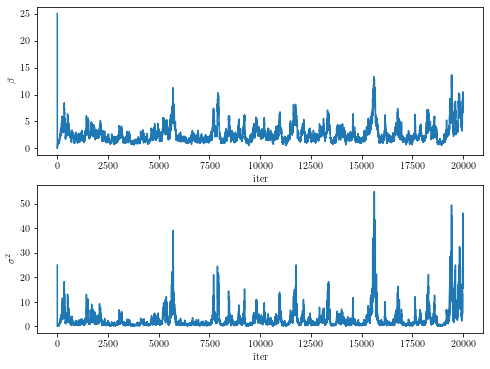

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm
from tqdm import tqdm
%matplotlib inline

probit_data = np.load('probit_data.npy')
n = len(probit_data)
x = probit_data[:,0].reshape(n,1)
y = probit_data[:,1].reshape(n,1)

# set the priors
beta_0, sigma2_0, tau2_0, nu_0 = 0., 1., 100., 3.


def beta_new(sigma2, z, x=x, beta_0=beta_0, tau2_0=tau2_0):
    """
    update beta
    """
    x2_sum = np.sum(x ** 2)
    x_z_sum = np.sum(x * z)
    beta_new = np.random.normal(loc = (beta_0 * sigma2 + tau2_0 * x_z_sum) / (sigma2 + tau2_0 * x2_sum), scale = np.sqrt((tau2_0 * sigma2) / (sigma2 + tau2_0 * x2_sum)))
   
    return beta_new


def sigma2_new(beta, z, x=x, n=n, nu_0=nu_0, sigma2_0=sigma2_0):
    """
    update sigma^2
    """
    square_sum = np.sum((z - x * beta) ** 2)
    sigma2_new = invgamma.rvs(a = (n + nu_0) / 2, scale = (nu_0 * sigma2_0 + square_sum) / 2)

    return sigma2_new


def z_i_new(i, sigma2, beta, x=x, y=y):
    """
    update z_i
    """
    x_i = x[i][0]
    y_i = y[i][0]
    mu_i = (x_i * beta) / (np.sqrt(sigma2))
    u_i = np.random.rand()

    if y_i == 1:
        z_i_new = x_i * beta + np.sqrt(sigma2) * norm.ppf(norm.cdf(-mu_i) + u_i * norm.cdf(mu_i))
    elif y_i == 0:
        z_i_new = x_i * beta + np.sqrt(sigma2) * norm.ppf(u_i * norm.cdf(-mu_i))

    return z_i_new


def true_posterior(beta, sigma2, n=n, beta_0=beta_0, sigma2_0=sigma2_0, tau2_0=tau2_0, nu_0=nu_0, x=x, y=y):
    """
    calculate the true posterior (unnormalized) of (beta, sigma^2)
    """
    beta_prior = norm.pdf(beta, loc=beta_0, scale=np.sqrt(tau2_0))
    sigma2_prior = invgamma.pdf(sigma2, a=0.5*nu_0, scale=0.5*nu_0*sigma2_0)
    prod = 1

    for i in range(n):
        x_i = x[i][0]
        y_i = y[i][0]
        prod *= (norm.cdf(x_i * beta / np.sqrt(sigma2)) ** y_i) * (1 - norm.cdf(x_i * beta / np.sqrt(sigma2))) ** (1 - y_i)

    posterior = beta_prior * sigma2_prior * prod

    return posterior


def Gibbs_sampler(num_iter, beta_init, sigma2_init, z_init, MH=False, beta_0=beta_0, sigma2_0=sigma2_0, tau2_0=tau2_0, nu_0=nu_0, x=x, y=y):
    """
    implement Gibbs sampler
    MH: when set True, insert a Metropolis-Hasting step after each Gibbs cycle that scales the current state of the Markov chain (default=False)
    """
    beta = beta_init
    sigma2 = sigma2_init
    z = z_init

    beta_list, sigma2_list = [beta], [sigma2]

    for iter in tqdm(range(num_iter)):
        # update beta
        beta = beta_new(sigma2=sigma2, z=z, x=x, beta_0=beta_0, tau2_0=tau2_0)
        beta_list.append(beta)

        # update sigma^2
        sigma2 = sigma2_new(beta=beta, z=z, x=x, n=n, nu_0=nu_0, sigma2_0=sigma2_0)
        sigma2_list.append(sigma2)

        # update z_i individually
        for i in range(n):
            z[i] = z_i_new(i=i, sigma2=sigma2, beta=beta, x=x, y=y)

        # Metropolis-Hastings step that scales the current state of the Markov chain
        if MH == True:
            s = np.random.exponential()
            a = min(1, (true_posterior(beta=s*beta, sigma2=s*sigma2) / true_posterior(beta=beta, sigma2=sigma2)) * np.exp(s - (1/s)))
            
            u = np.random.rand()
            if u < a:
                beta = s * beta
                sigma2 = s * sigma2

    return beta_list, sigma2_list


# initialize the Gibbs sampler
beta_init, sigma2_init = 25, 25
z_init = np.zeros((n,1))
num_iter = 20000

# run the Gibbs sampler
beta_list, sigma2_list = Gibbs_sampler(num_iter=num_iter, beta_init=beta_init, sigma2_init=sigma2_init, z_init=z_init, MH=False)


# generate the trace plots of beta and sigma^2
fig, (ax1, ax2) = plt.subplots(2,1)
plt.rcParams.update({
    "text.usetex": True
})

ax1.plot(np.linspace(0, num_iter, num_iter+1), np.array(beta_list))
ax1.set_xlabel('$\\rm iter$')
ax1.set_ylabel('$\\beta$')

ax2.plot(np.linspace(0, num_iter, num_iter+1), np.array(sigma2_list))
ax2.set_xlabel('$\\rm iter$')
ax2.set_ylabel('$\\sigma^2$')

fig.set_size_inches(8,6)
plt.savefig('2-3-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

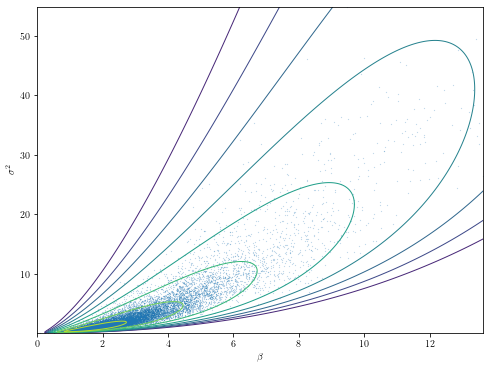

In [10]:
# plot samples and contours
beta_grid, sigma2_grid = np.meshgrid(np.linspace(np.min(beta_list[1:]), np.max(beta_list[1:]), 1000), np.linspace(np.min(sigma2_list[1:]), np.max(sigma2_list[1:]), 1000))
posterior = true_posterior(beta_grid, sigma2_grid)
log_posterior = np.log(posterior + 1e-25)

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.contour(beta_grid, sigma2_grid, log_posterior, levels=10, linewidths=1)
ax.scatter(np.array(beta_list[1:]), np.array(sigma2_list[1:]), s=0.01)
fig.set_size_inches(8,6)
plt.xlabel('$\\beta$')
plt.ylabel('$\\sigma^2$')
plt.savefig('2-3-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(2) Now consider an alternative sampler that inserts a Metropolis-Hasting step after each Gibbs cycle which scales the current state of the Markov chain, $(\beta^{(t)},(\sigma^{2})^{(t)})$, by a factor $s$ which is drawn from an exponential distribution, Exp$(1)$. The rescaled state is accepted or rejected according to the usual Metropolis-Hastings procedure. Implement this sampler and conduct a similar simulation as in part $(1)$, again plotting the samples on top of the contours of the true posterior. Which sampler mixes more quickly?

***Proof.*** The Metropolis-Hastings step scales the current state of the Markov chain $(\beta, \sigma^2)$ by factor $s\sim{\rm Exp}(1)$ to generate $(s\beta, s\sigma^2)$ as a proposed new state. Consider that $p(s)=e^{-s}$, we have
$$
Q(s\beta, s\sigma^2|\beta, \sigma^2)=p(s)=e^{-s}\tag{35}
$$
and
$$
Q(\beta, \sigma^2|s\beta, s\sigma^2)=p\Big(\frac{1}{s}\Big)=e^{-\frac{1}{s}}\tag{36}
$$
Hence the acceptance probability
$$
a(s\beta, s\sigma^2|\beta, \sigma^2)=\min{\Big(1, \frac{p(s\beta, s\sigma^2|\boldsymbol{x}, \boldsymbol{y})Q(\beta, \sigma^2|s\beta, s\sigma^2)}{p(\beta, \sigma^2|\boldsymbol{x}, \boldsymbol{y})Q(s\beta, s\sigma^2|\beta, \sigma^2)}\Big)}=\min{\Big(1,\frac{p(s\beta, s\sigma^2|\boldsymbol{x}, \boldsymbol{y})}{p(\beta, \sigma^2|\boldsymbol{x}, \boldsymbol{y})}\exp{\big(s-\frac{1}{s}\big)}\Big)}\tag{37}
$$
in which $p(s\beta, s\sigma^2|\boldsymbol{x}, \boldsymbol{y})$ and $p(\beta, \sigma^2|\boldsymbol{x}, \boldsymbol{y})$ can be calculated via $(6)$. Python implementation of this alternative Gibbs sampler is as follows.

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [18:26<00:00, 18.08it/s]


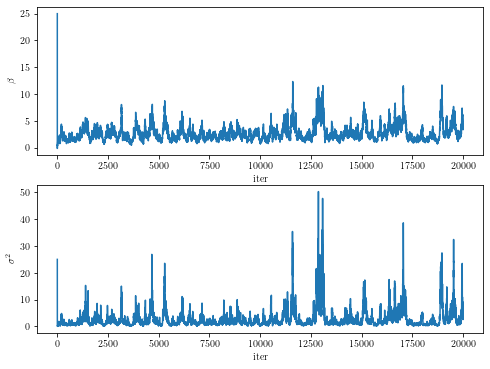

In [3]:
# initialize the Gibbs sampler
beta_init, sigma2_init = 25, 25
z_init = np.zeros((n,1))
num_iter = 20000

# run the Gibbs sampler
beta_list, sigma2_list = Gibbs_sampler(num_iter=num_iter, beta_init=beta_init, sigma2_init=sigma2_init, z_init=z_init, MH=True)


# generate the trace plots of beta and sigma^2
fig, (ax1, ax2) = plt.subplots(2,1)
plt.rcParams.update({
    "text.usetex": True
})

ax1.plot(np.linspace(0, num_iter, num_iter+1), np.array(beta_list))
ax1.set_xlabel('$\\rm iter$')
ax1.set_ylabel('$\\beta$')

ax2.plot(np.linspace(0, num_iter, num_iter+1), np.array(sigma2_list))
ax2.set_xlabel('$\\rm iter$')
ax2.set_ylabel('$\\sigma^2$')

fig.set_size_inches(8,6)
plt.savefig('2-3-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

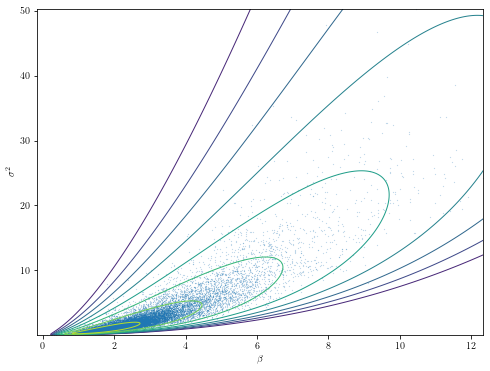

In [4]:
# plot samples and contours
beta_grid, sigma2_grid = np.meshgrid(np.linspace(np.min(beta_list[1:]), np.max(beta_list[1:]), 1000), np.linspace(np.min(sigma2_list[1:]), np.max(sigma2_list[1:]), 1000))
posterior = true_posterior(beta_grid, sigma2_grid)
log_posterior = np.log(posterior + 1e-25)

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.contour(beta_grid, sigma2_grid, log_posterior, levels=10, linewidths=1)
ax.scatter(np.array(beta_list[1:]), np.array(sigma2_list[1:]), s=0.01)
fig.set_size_inches(8,6)
plt.xlabel('$\\beta$')
plt.ylabel('$\\sigma^2$')
plt.savefig('2-3-4.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that the Gibbs sampler with Metropolis-Hastings rescaling steps mixes more quickly than the vanilla Gibbs sampler (see the trace plots of $\sigma^2$).

## Problem 4

Consider a logistic regression model with normal priors
$$
y_{i}\sim{\rm Bernoulli}(p_i), \ \ p_i=\frac{1}{1+\exp{(-x^{T}_{i}\beta)}},\ \  i=1,\ldots ,n.\ \ \beta\sim\mathcal{N}(0,\sigma^{2}_{\beta})\tag{38}
$$
where $\sigma_{\beta}=1$. Download the data from the course website.

(1) Implement a Hamiltonian Monte Carlo sampler to collect $500$ samples (with $500$ discarded as burn-in), show the scatter plot. Test the following two strategies for the number of leapfrog steps $L$: $(1)$ use a fixed $L$; $(2)$ use a random one, say ${\rm Uniform}(1,L_{\rm max}$).Do you find any difference? Explain it.

***Proof.*** The logistic regression model gives
$$
p_i=p(y_i=1|\boldsymbol{x}_i,\boldsymbol{\beta})=\frac{1}{1+\exp{(-\boldsymbol{x}^{T}_i\boldsymbol{\beta})}}\tag{39}
$$
in which $\boldsymbol{\beta}=(\beta_1,\beta_2)^{T}$ with a bivariate normal prior $\boldsymbol{\beta}\sim\mathcal{N}(0,\boldsymbol{I})$.
Consider the observed data $\boldsymbol{X}=(\boldsymbol{x}_1, \ldots,\boldsymbol{x}_n)^{T}$, $\boldsymbol{y}=(y_1,\ldots,y_n)^{T}$, the log likelihood $L(\boldsymbol{\beta})$ of the logistic regression model is
$$
\begin{aligned}
L(\boldsymbol{\beta})=\log{p(\boldsymbol{y}|\boldsymbol{X},\boldsymbol{\beta})}&=\log\prod_{i=1}^{n}p_i^{y_i}(1-p_i)^{(1-y_i)}\\
&=\sum_{i=1}^{n}-y_i\log(1+\exp{(-\boldsymbol{x}^{T}_i\boldsymbol{\beta}}))+(1-y_i)(-\boldsymbol{x}^{T}_i\boldsymbol{\beta}-\log{(1+\exp{(-\boldsymbol{x}^{T}_i\boldsymbol{\beta}})})\\
&=\sum_{i=1}^{n}\boldsymbol{x}^{T}_i\boldsymbol{\beta}(y_i-1)-\log{(1+\exp{(-\boldsymbol{x}^{T}_i\boldsymbol{\beta})})}\\
&=\boldsymbol{\beta}^{T}\boldsymbol{X}^{T}(\boldsymbol{y}-\boldsymbol{1}_n)-\boldsymbol{1}_n^{T}\log{(1+\exp{(-\boldsymbol{X}\boldsymbol{\beta})})}
\end{aligned}\tag{40}
$$
Given the prior $\boldsymbol{\beta}\sim\mathcal{N}(0,\boldsymbol{I})$, we calculate
$$
\log p(\boldsymbol{\beta})=\log{\Big(\frac{1}{\sqrt{2\pi}}}\exp{\Big(-\frac{\boldsymbol{\beta}^{T}\boldsymbol{\beta}}{2}\Big)\Big)}=-\frac{\boldsymbol{\beta}^{T}\boldsymbol{\beta}}{2}\tag{41}
$$
up to a constant which is omitted. Hence the log posterior
$$
\log p(\boldsymbol{\beta}|\boldsymbol{X},\boldsymbol{y})=L(\boldsymbol{\beta})+\log p(\boldsymbol{\beta})=\boldsymbol{\beta}^{T}\boldsymbol{X}^{T}(\boldsymbol{y}-\boldsymbol{1}_n)-\boldsymbol{1}_n^{T}\log{(1+\exp{(-\boldsymbol{X}\boldsymbol{\beta})})}-\frac{\boldsymbol{\beta}^{T}\boldsymbol{\beta}}{2}\tag{42}
$$

We introduce momentum $\boldsymbol{r}\sim\mathcal{N}(0,\boldsymbol{I})$ which carries Euclidean-Gaussian kinetic energy
$$
K(\boldsymbol{r})=\frac{\boldsymbol{r}^{T}\boldsymbol{r}}{2}\tag{43}
$$
and potential energy
$$
U(\boldsymbol\beta)=-\log p(\boldsymbol{\beta}|\boldsymbol{X},\boldsymbol{y})=-\boldsymbol{\beta}^{T}\boldsymbol{X}^{T}(\boldsymbol{y}-\boldsymbol{1}_n)+\boldsymbol{1}_n^{T}\log{(1+\exp{(-\boldsymbol{X}\boldsymbol{\beta})})}+\frac{\boldsymbol{\beta}^{T}\boldsymbol{\beta}}{2}\tag{44}
$$
to define Hamiltonian
$$
H(\boldsymbol{\beta},\boldsymbol{r})=U(\boldsymbol\beta)+K(\boldsymbol{r})=-\boldsymbol{\beta}^{T}\boldsymbol{X}^{T}(\boldsymbol{y}-\boldsymbol{1}_n)+\boldsymbol{1}_n^{T}\log{(1+\exp{(-\boldsymbol{X}\boldsymbol{\beta})})}+\frac{\boldsymbol{\beta}^{T}\boldsymbol{\beta}}{2}+\frac{\boldsymbol{r}^{T}\boldsymbol{r}}{2}\tag{45}
$$
To run leap-frog algorithm, we also calculate
$$
\nabla_{\boldsymbol{\beta}}U(\boldsymbol{\beta})=-\boldsymbol{X}^{T}\Big(\boldsymbol{y}-\boldsymbol{1}_n+\frac{\exp{(-\boldsymbol{X}\boldsymbol{\beta})}}{1+\exp{(-\boldsymbol{X}\boldsymbol{\beta})}}\Big)+\boldsymbol{\beta}\tag{46}
$$
and
$$
\nabla_{\boldsymbol{r}}K(\boldsymbol{r})=\boldsymbol{r}\tag{47}
$$
Let $L$ be the number of leap-frog steps, the Hamiltonian Monte Carlo algorithm (in one iteration) is described as follows:
1. sample momentum $\boldsymbol{r}\sim\mathcal{N}(0,\boldsymbol{I})$
2. run leap-frog integrator for $L$ steps 
3. accept new position with probability
$$
a=\min\Big(1,\exp{\big(-H(\boldsymbol{\beta}',\boldsymbol{r}')+H(\boldsymbol{\beta},\boldsymbol{r})\big)}\Big)\tag{48}
$$

Python implementation of the Hamiltonian Monte Carlo sampler is as follows. $L$, $L_{\rm max}$ and step-size $\varepsilon$ are tuned empirically. $\boldsymbol{\beta}$ is initialized at $(0,0)^{T}$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm
from tqdm import tqdm
%matplotlib inline

logistic_data = np.load('mcs_hw2_p3_data.npy')
n = len(logistic_data)
X = logistic_data[:,0:2]
y = logistic_data[:,2].reshape(n,1)


def U(beta, X=X, y=y):
    """
    calculate the potential energy U(beta)
    """
    U = -np.dot(np.dot(beta.T, X.T), (y - np.ones((n,1)))) + np.dot(np.ones((1,n)), np.log(1 + np.exp(-np.dot(X, beta)))) + 0.5 * np.dot(beta.T, beta)

    return U


def K(r):
    """
    calculate the kinetic energy K(r)
    """
    K = 0.5 * np.dot(r.T, r)

    return K


def nabla_U(beta, X=X, y=y):
    """
    calculate the gradient of the potential energy U(beta)
    """
    nabla_U = -np.dot(X.T, y - np.ones((n,1)) + np.exp(-np.dot(X, beta)) / (1 + np.exp(-np.dot(X, beta)))) + beta

    return nabla_U


def nabla_K(r):
    """
    calculate the gradient of the kinetic energy K(r)
    """
    return r


def H(beta, r, X=X, y=y):
    """
    calculate the Hamiltonian
    """
    return U(beta, X=X, y=y) + K(r)


def accept_p(beta_new, r_new, beta_init, r_init, X=X, y=y):
    """
    calculate the acceptance probability
    """
    a = min(1, np.exp(-H(beta_new, r_new, X=X, y=y) + H(beta_init, r_init, X=X, y=y)))

    return a


def leap_frog(beta, r, epsilon, X=X, y=y):
    """
    perform one step of leap-frog algorithm
    """
    r_m = r - 0.5 * epsilon * nabla_U(beta, X=X, y=y)
    beta_new = beta + epsilon * nabla_K(r_m)
    r_new = r_m - 0.5 * epsilon * nabla_U(beta_new, X=X, y=y)

    return beta_new, r_new


def HMC(L, sample_num, burn_in_num, epsilon, beta_0=np.zeros((2,1)), rand_steps=False, X=X, y=y):
    """
    implement Hamiltonian Monte Carlo algorithm\n
    if rand_steps is set to False (default), use a fixed L=L; otherwise use a random L ~ Uniform(1,L)
    """
    beta = beta_0
    beta_list = beta.copy()
    sample_collected = 0

    with tqdm(total = sample_num + burn_in_num) as pbar:
        while sample_collected < sample_num + burn_in_num:
            beta_init = beta.copy()
            r = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2)).reshape(2,1)
            r_init = r.copy()

            if rand_steps == False:
                L = L
            elif rand_steps == True:
                L = np.random.randint(low=1, high=L+1)

            for step in range(L):
                beta, r = leap_frog(beta, r, epsilon=epsilon, X=X, y=y)

            u = np.random.rand()
            if u < accept_p(beta_new=beta, r_new=r, beta_init=beta_init, r_init=r_init, X=X, y=y):
                sample_collected += 1
                pbar.update(1)
                if sample_collected > burn_in_num:
                    beta_list = np.concatenate((beta_list, beta.copy()), axis=1)
            else:
                beta = beta_init.copy()
                r = r_init.copy()

    return beta_list


(a) use a fixed $L=10$

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.94it/s]


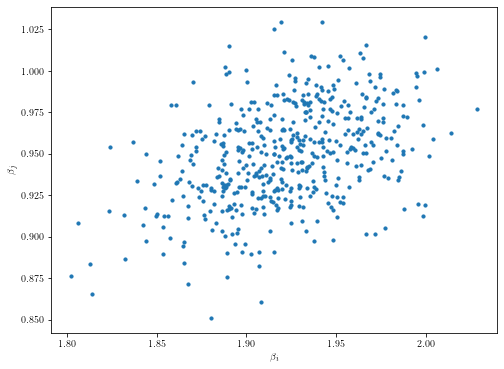

In [12]:
# initialize and run the HMC sampler
beta_list = HMC(L=10, sample_num=500, burn_in_num=500, epsilon=0.01, rand_steps=False)


# plot scatter
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.scatter(beta_list[0][1:], beta_list[1][1:], s=10)

fig.set_size_inches(8,6)
plt.xlabel('$\\beta_i$')
plt.ylabel('$\\beta_j$')
plt.savefig('2-4-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(b) use a random $L\sim{\rm Uniform}(1,L_{\rm max})$ where $L_{\rm max}=20$.

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 533.78it/s]


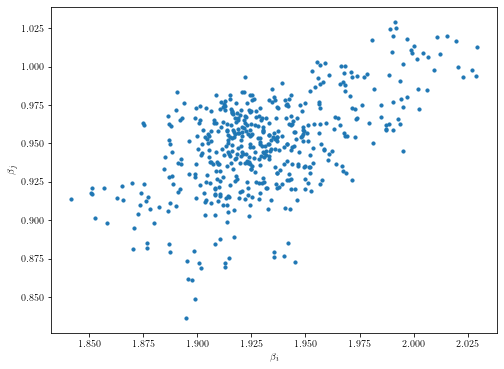

In [13]:
# initialize and run the HMC sampler
beta_list = HMC(L=20, sample_num=500, burn_in_num=500, epsilon=0.01, rand_steps=True)


# plot scatter
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.scatter(beta_list[0][1:], beta_list[1][1:], s=10)

fig.set_size_inches(8,6)
plt.xlabel('$\\beta_i$')
plt.ylabel('$\\beta_j$')
plt.savefig('2-4-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that to collect certain amount of samples, the HMC sampler using a random $L\sim{\rm Uniform}(1,L_{\rm max})$ is significantly faster ($\sim 10\, {\rm times}$) than the vanilla HMC sampler using a fixed $L$, where we set $L_{\rm max}=2L$. However, the HMC sampler using a fixed $L$ mixes better (see the scatter plots).

(2) Run HMC for $100000$ iterations and discard the first $50000$ samples as burn-in to form the ground truth. Implement stochastic gradient MCMC algorithms including SGLD, SGHMC and SGNHT. Show the convergence rate of different SGMCMC algorithms in terms of KL divergence to the ground truth as a function of iterations. You may want to use the ITE package https://bitbucket.org/szzoli/ite-in-python/src/ to compute the KL divergence between two samples.

***Proof.*** We first run HMC to form the ground truth, which is saved as ground_truth.npy using NumPy package. For coding convenience, we run HMC to collect $50000$ samples (instead of running $100000$ iterations) with the first $50000$ samples discarded as burn-in.

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [15:28<00:00, 107.66it/s]


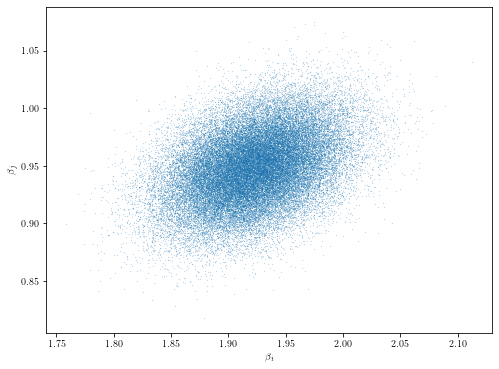

In [14]:
# initialize and run the HMC sampler
beta_list = HMC(L=10, sample_num=50000, burn_in_num=50000, epsilon=0.01, rand_steps=False)
np.save(file='ground_truth', arr=beta_list[:,1:])


# plot scatter
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.scatter(beta_list[0][1:], beta_list[1][1:], s=0.01)

fig.set_size_inches(8,6)
plt.xlabel('$\\beta_i$')
plt.ylabel('$\\beta_j$')
plt.savefig('2-4-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

Next we implement stochastic gradient MCMC algorithms including SGLD, SGHMC and SGNHT. We show the convergence rate of different SGMCMC algorithms in terms of KL divergence (computed by the ITE package) to the ground truth as a function of iterations. Each SGMCMC algorithm is run for $1000$ iterations and results of the first $4$ iterations are omitted due to limitations of KL divergence computation.

(a) Stochastic Gradient Langevin Dynamics, SGLD

Given the observed data $\boldsymbol{X}$, $\boldsymbol{y}$, we iteratively update $\boldsymbol{\beta}$ via
$$
\boldsymbol{\beta}_{t+1}=\boldsymbol{\beta}_t+\frac{\varepsilon_t}{2}g(\boldsymbol{\beta}_t)+\boldsymbol{\eta}_t\tag{49}
$$
in which $\boldsymbol{\eta}_t\sim\mathcal{N}(0,\varepsilon_t\boldsymbol{I})$ and
$$
\begin{aligned}
g(\boldsymbol{\beta}_t)&=\nabla_{\boldsymbol{\beta}}\log{p(\boldsymbol{\beta}_t)}+\frac{n}{n'}\sum_{i=1}^{n'}\nabla_{\boldsymbol{\beta}}\log{p(y_i|\boldsymbol{x_i},\boldsymbol{\beta}_t)}\\
&=-\boldsymbol{\beta}_t+\frac{n}{n'}\boldsymbol{X}'^{T}\Big(\boldsymbol{y}'-\boldsymbol{1}_{n'}+\frac{\exp{(-\boldsymbol{X}'\boldsymbol{\beta_t})}}{1+\exp{(-\boldsymbol{X}'\boldsymbol{\beta}_t)}}\Big)
\end{aligned}\tag{50}
$$
in which we use $\boldsymbol{X}'$ and $\boldsymbol{y}'$ to denote a subset (batch) of data. The algorithm requires that step size $\varepsilon_t$ decreases to $0$ slowly, thus we empirically set 
$$
\varepsilon_t=\varepsilon_0 e^{-\lambda_0 t}\tag{51}
$$
Python implementation of SGLD is as follows. Hyper parameters $\varepsilon_0$ and $\lambda_0$ are tuned empirically. $\boldsymbol{\beta}$ is initialized at $(0,0)^{T}$.

(b) Stochastic Gradient Hamiltonian Monte Carlo, SGHMC

The SGHMC algorithm iteratively update $\boldsymbol{\beta}$ and momentum $\boldsymbol{r}$ via
$$
\begin{aligned}
\boldsymbol{\beta}_{t+1}&=\boldsymbol{\beta}_t + \varepsilon_t\boldsymbol{M}^{-1}\boldsymbol{r}_t\\
\boldsymbol{r}_{t+1}&=\boldsymbol{r}_t+\varepsilon_t g(\boldsymbol{\beta}_{t+1})-\varepsilon_t C\boldsymbol{M}^{-1}\boldsymbol{r}_t+\mathcal{N}(0,2C\varepsilon_t\boldsymbol{I})
\end{aligned}\tag{52}
$$
in which $\boldsymbol{M}=\boldsymbol{I}$ (Euclidean-Gaussian kinetic energy). $\varepsilon_t$ is set as $(38)$.

Python implementation of SGHMC is as follows. Hyper parameters $\varepsilon_0$, $\lambda_0$ and $C$ are tuned empirically. $\boldsymbol{\beta}$ is initialized at $(0,0)^{T}$.

(c) Stochastic Gradient Nosé-Hoover Thermostat, SGNHT

The SGNHT algorithm iteratively update $\boldsymbol{\beta}$, momentum $\boldsymbol{r}$ and the thermostat $\xi$ via
$$
\begin{aligned}
\boldsymbol{r}_{t+1}&=\boldsymbol{r}_t+\varepsilon_t g(\boldsymbol{\beta_t})-\varepsilon_t \xi_t\boldsymbol{r}_t+\sqrt{2A}\mathcal{N}(0, \varepsilon_t\boldsymbol{I})\\
\boldsymbol{\beta}_{t+1}&=\boldsymbol{\beta}_t + \varepsilon_t\boldsymbol{r}_{t+1}\\
\xi_{t+1}&=\xi_t+\varepsilon_t\Big(\frac{\boldsymbol{r}^{T}_{t+1}\boldsymbol{r}_{t+1}}{d}-1\Big)
\end{aligned}\tag{53}
$$
in which $d=2$ is the dimension of $\boldsymbol{\beta}$. $\varepsilon_t$ is set as $(38)$.

Python implementation of SGNHT is as follows. Hyper parameters $\varepsilon_0$, $\lambda_0$ and $A$ are tuned empirically. $\boldsymbol{\beta}$ is initialized at $(0,0)^{T}$.

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.54it/s]


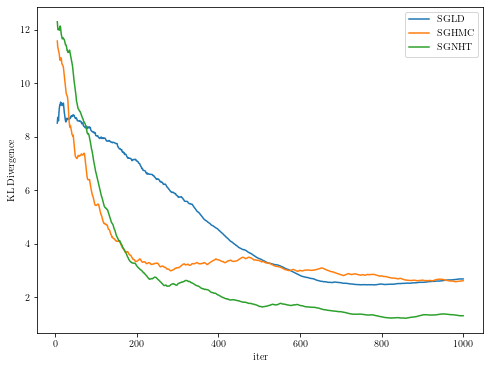

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm
from tqdm import tqdm
import ite
#%matplotlib inline

logistic_data = np.load('mcs_hw2_p3_data.npy')
n = len(logistic_data)
X = logistic_data[:,0:2]
y = logistic_data[:,2].reshape(n,1)

beta_ground_truth = np.load('ground_truth.npy')


def draw_batch(n_batch, n=n, X=X, y=y):
    """
    draw a batch (batch size = n_batch) of data items randomly from the raw data
    """
    batch_id = np.arange(n)
    np.random.shuffle(batch_id)
    X_batch = X[batch_id[:n_batch],:]
    y_batch = y[batch_id[:n_batch],:]

    return X_batch, y_batch


def KL_div(data, ground_truth=beta_ground_truth):
    """
    calculate KL divergence between the given data distribution and the ground-truth distribution
    """
    co = ite.cost.BDKL_KnnK()
    d = co.estimation(data.T, ground_truth.T)
    
    return d


def g(beta, n_batch, n=n, X=X, y=y):
    """
    calculate g(beta) for SGLD\n
    n_batch: batch size\n
    """
    X_batch, y_batch = draw_batch(n_batch=n_batch, n=n, X=X, y=y) 

    g = -beta + (n / n_batch) * np.dot(X_batch.T, y_batch - np.ones((n_batch,1)) + np.exp(-np.dot(X_batch, beta)) / (1 + np.exp(-np.dot(X_batch, beta))))

    return g


def SGLD(iter_num, KL_start, n_batch, epsilon_0, lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth):
    """
    implement Stochastic Gradient Langevin Dynamics algorithm\n
    start to calculate KL divergence at KL_start-th iteration
    """
    beta = beta_0
    beta_list = beta.copy()
    KL_div_list = []

    for iter in tqdm(range(iter_num)):
        epsilon = epsilon_0 * np.exp(-lambda_0 * iter)
        eta = np.random.multivariate_normal(mean=np.array([0,0]), cov=epsilon*np.eye(2)).reshape(2,1)
        beta_new = beta + 0.5 * epsilon * g(beta=beta, n_batch=n_batch, n=n, X=X, y=y) + eta

        beta_list = np.concatenate((beta_list, beta_new.copy()), axis=1)
        if iter >= KL_start - 1:
            KL_div_list.append(KL_div(data=beta_list, ground_truth=ground_truth))
        
        beta = beta_new

    return KL_div_list


def SGHMC(iter_num, KL_start, n_batch, C, epsilon_0, lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth):
    """
    implement Stochastic Gradient Hamiltonian Monte Carlo algorithm\n
    start to calculate KL divergence at KL_start-th iteration
    """
    beta = beta_0
    r = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2)).reshape(2,1)
    beta_list = beta.copy()
    KL_div_list = []

    for iter in tqdm(range(iter_num)):
        epsilon = epsilon_0 * np.exp(-lambda_0 * iter)
        eta = np.random.multivariate_normal(mean=np.array([0,0]), cov=2*C*epsilon*np.eye(2)).reshape(2,1)

        beta_new = beta + epsilon * r
        r_new = r + epsilon * g(beta=beta, n_batch=n_batch, n=n, X=X, y=y) - epsilon * C * r + eta

        beta_list = np.concatenate((beta_list, beta_new.copy()), axis=1)
        if iter >= KL_start - 1:
            KL_div_list.append(KL_div(data=beta_list, ground_truth=ground_truth))
        
        beta = beta_new
        r = r_new

    return KL_div_list


def SGNHT(iter_num, KL_start, n_batch, A, epsilon_0, lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth):
    """
    implement Stochastic Gradient Nose-Hoover Thermostat algorithm\n
    start to calculate KL divergence at KL_start-th iteration
    """
    beta = beta_0
    r = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2)).reshape(2,1)
    xi = A

    beta_list = beta.copy()
    KL_div_list = []

    for iter in tqdm(range(iter_num)):
        epsilon = epsilon_0 * np.exp(-lambda_0 * iter)
        eta = np.sqrt(2 * A) * np.random.multivariate_normal(mean=np.array([0,0]), cov=epsilon*np.eye(2)).reshape(2,1)

        r_new = r + epsilon * g(beta=beta, n_batch=n_batch, n=n, X=X, y=y) - epsilon * xi * r + eta
        beta_new = beta + epsilon * r_new
        xi_new = xi + epsilon * (0.5 * np.dot(r_new.T, r_new) - 1)

        beta_list = np.concatenate((beta_list, beta_new.copy()), axis=1)
        if iter >= KL_start -1:
            KL_div_list.append(KL_div(data=beta_list, ground_truth=ground_truth))
        
        beta = beta_new
        r = r_new
        xi = xi_new

    return KL_div_list


# set the parameters of the SGMCMC samplers
iter_num = 1000
KL_start = 5
n_batch = 100


# run the SGLD sampler
epsilon_0 = 0.0075
lambda_0 = 0.01

KL_div_list_SGLD = SGLD(iter_num=iter_num, KL_start=KL_start, n_batch=n_batch, epsilon_0=epsilon_0, lambda_0=lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth)


# run the SGHMC sampler
epsilon_0 = 0.0075
c_0 = 80
lambda_0 = 1e-5

KL_div_list_SGHMC = SGHMC(iter_num=iter_num, KL_start=KL_start, n_batch=n_batch, C=c_0, epsilon_0=epsilon_0, lambda_0=lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth)


# run the SGNHT sampler
epsilon_0 = 0.0075
a_0 = 110
lambda_0 = 1e-5

KL_div_list_SGNHT = SGNHT(iter_num=iter_num, KL_start=KL_start, n_batch=n_batch, A=a_0, epsilon_0=epsilon_0, lambda_0=lambda_0, beta_0=np.zeros((2,1)), n=n, X=X, y=y, ground_truth=beta_ground_truth)


# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.plot(np.arange(KL_start, iter_num + 1), np.array(KL_div_list_SGLD), label='\\rm SGLD')
ax.plot(np.arange(KL_start, iter_num + 1), np.array(KL_div_list_SGHMC), label='\\rm SGHMC')
ax.plot(np.arange(KL_start, iter_num + 1), np.array(KL_div_list_SGNHT), label='\\rm SGNHT')

fig.set_size_inches(8,6)
plt.xlabel('$\\rm iter$')
plt.ylabel('$\\rm KL \, Divergence$')
plt.legend()
plt.savefig('2-4-4.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that three SDMCMC algorithms are of approximately linear convergence rates in terms of KL divergence to the ground truth as a function of iterations before converged. SGHMC and SGNHT enjoy similar convergence rates, while SGLD is significantly slower. Meanwhile, SGLD and SGHMC converge to a similar distribution, while SGNHT converges to a distribution closer to the ground-truth.